In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [73]:
data = pd.read_csv("./marziani.csv")
data.head()

,specie,colore,n_arti,peso,altezza,larghezza
0,Robby,viola,20.0,3.87,14.77,73.22
1,Robby,viola,27.0,3.15,28.19,88.44
2,Robby,viola,25.0,4.35,12.05,76.74
3,Robby,blu,20.0,3.76,9.90,81.37
4,Robby,blu,28.0,2.86,19.87,84.65


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   specie     2000 non-null   object 
 1   colore     1993 non-null   object 
 2   n_arti     1994 non-null   float64
 3   peso       2000 non-null   float64
 4   altezza    1995 non-null   float64
 5   larghezza  1997 non-null   float64
dtypes: float64(4), object(2)
memory usage: 93.9+ KB


In [75]:
features = ["colore", "n_arti", "peso", "altezza", "larghezza"]
target = "specie"

In [76]:
data.dropna(inplace=True, subset=features)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1979 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   specie     1979 non-null   object 
 1   colore     1979 non-null   object 
 2   n_arti     1979 non-null   float64
 3   peso       1979 non-null   float64
 4   altezza    1979 non-null   float64
 5   larghezza  1979 non-null   float64
dtypes: float64(4), object(2)
memory usage: 108.2+ KB


In [77]:
data.describe()

,n_arti,peso,altezza,larghezza
count,1979.000000,1979.000000,1979.000000,1979.000000
mean,24.591208,3.995063,25.123734,77.461198
std,2.893657,0.706109,9.118858,11.102392
min,20.000000,2.130000,3.170000,44.700000
25%,22.000000,3.470000,17.330000,69.445000
50%,25.000000,3.990000,24.020000,73.540000
75%,27.000000,4.530000,32.615000,84.785000
max,29.000000,6.110000,49.750000,117.450000


In [78]:
# trasformo il colore in numeri
labelencoder_colore = preprocessing.LabelEncoder()
labelencoder_colore.fit(data["colore"])
data["colore"] = labelencoder_colore.transform(data["colore"])
print(labelencoder_colore.classes_)

# traformo la specie in numeri
labelencoder_specie = preprocessing.LabelEncoder()
labelencoder_specie.fit(data["specie"])
data["specie"] = labelencoder_specie.transform(data["specie"])
print(labelencoder_specie.classes_)


# normalizza le features 
scaler = StandardScaler()
scaler.fit(data[features])
data[features] = scaler.transform(data[features])


data

['blu' 'rosso' 'viola']
['Robby' 'Simmy']


,specie,colore,n_arti,peso,altezza,larghezza
0,0,1.234554,-1.587047,-0.177161,-1.135707,-0.382104
1,0,1.234554,0.832649,-1.197092,0.336340,0.989118
2,0,1.234554,0.141308,0.502793,-1.434065,-0.064975
3,0,-1.213525,-1.587047,-0.332984,-1.669900,0.352157
4,0,-1.213525,1.178320,-1.607897,-0.576285,0.647664
...,...,...,...,...,...,...
1995,1,1.234554,1.523991,0.786107,1.135985,-0.810048
1996,1,-1.213525,-0.550034,-0.219658,0.519524,-0.536164
1997,1,1.234554,-0.895705,0.786107,0.470163,-0.818156
1998,1,0.010515,0.832649,0.757776,0.877115,-0.843383


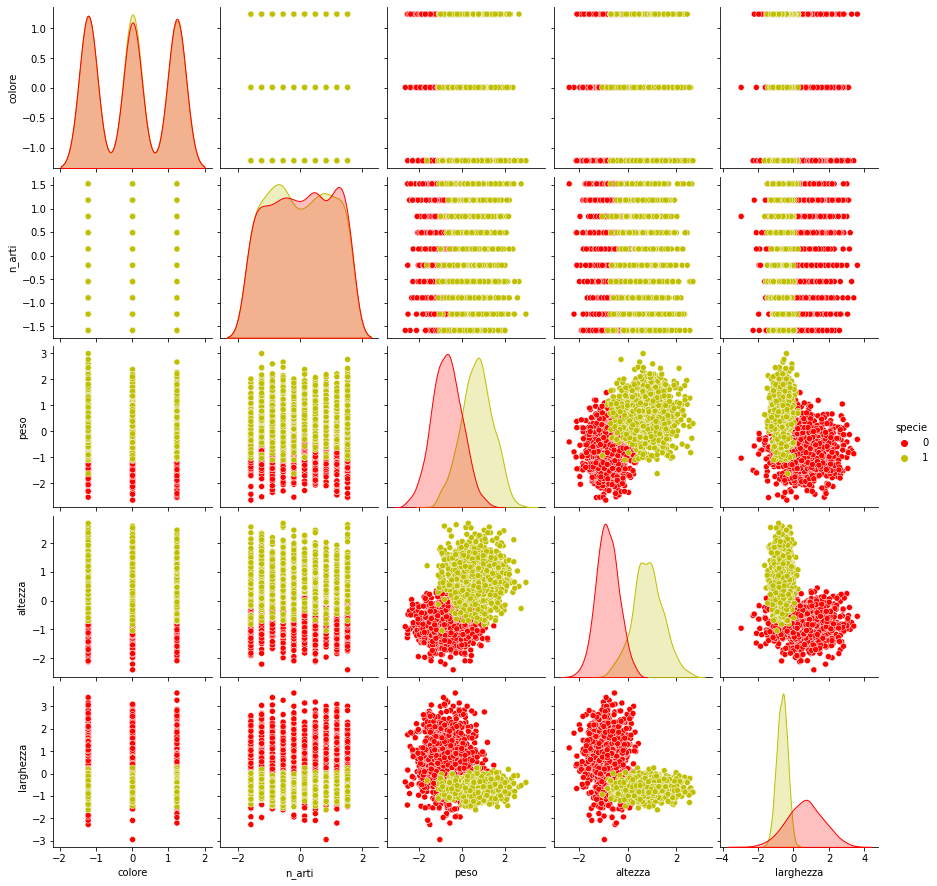

In [81]:
import seaborn as sns
sns_plot = sns.pairplot(data, hue=target, palette=["r","y"], vars=features)

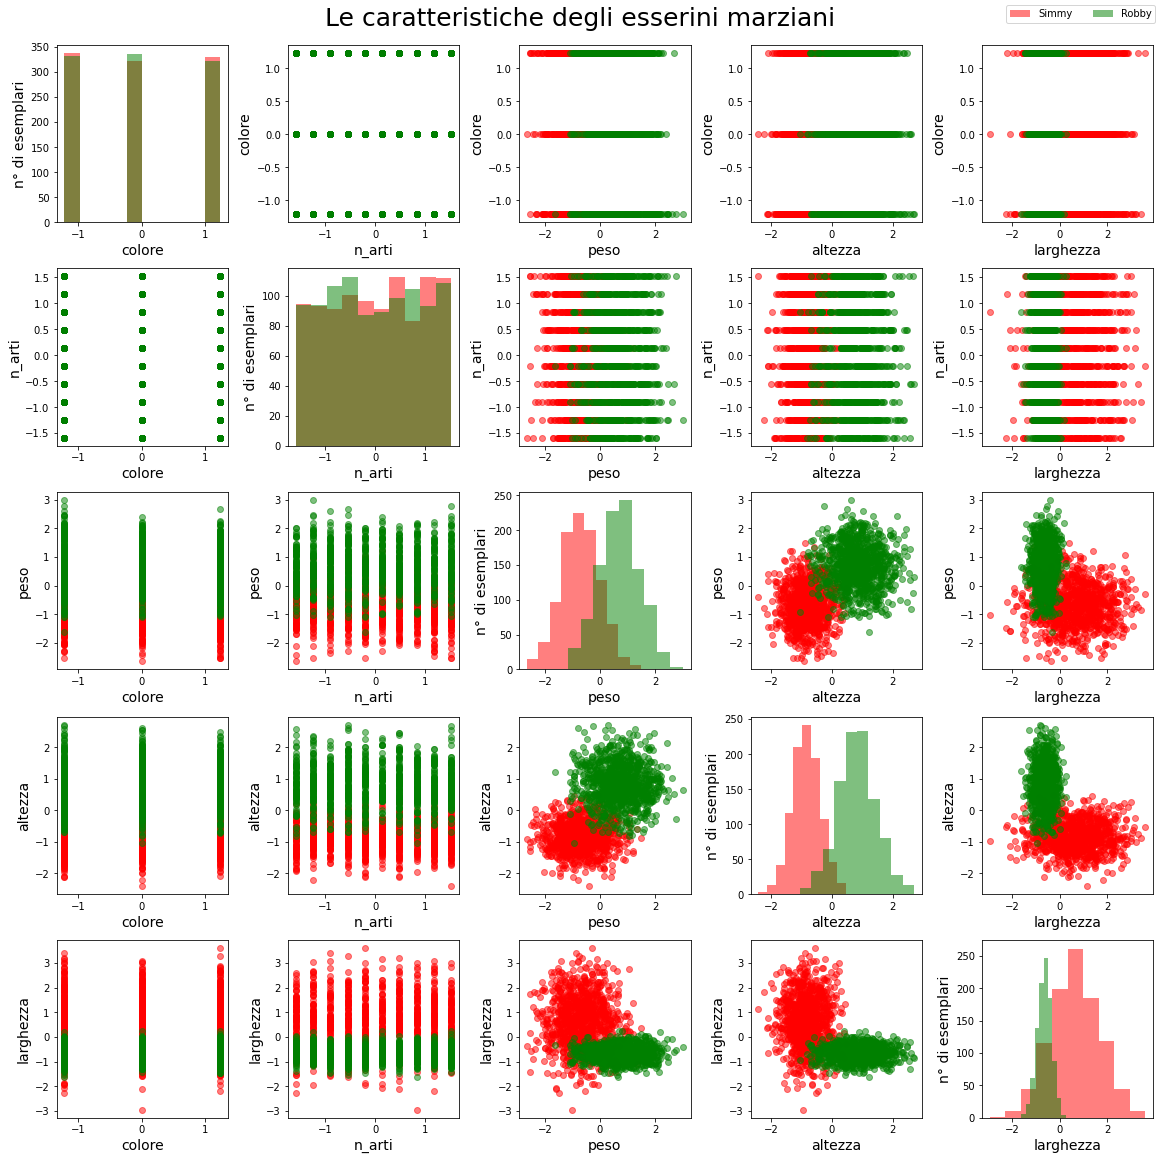

In [82]:
n = len(features)
fig, axs = plt.subplots(n, n, figsize=(16,16), constrained_layout=True)
for j, dato_y in enumerate(features):
    for i, dato_x in enumerate(features):
        maschera_simmy = data['specie']==0
        maschera_robby = data['specie']==1
        if i!=j:
            axs[j,i].scatter(data[maschera_simmy][dato_x], 
                       data[maschera_simmy][dato_y], c="r", label="Simmy", alpha=0.5)
            axs[j,i].scatter(data[maschera_robby][dato_x], 
                       data[maschera_robby][dato_y], c="g", label="Robby", alpha=0.5)
            axs[j,i].set_xlabel(dato_x, fontsize=14)
            axs[j,i].set_ylabel(dato_y, fontsize=14)
        else:
            axs[j,i].hist(data[maschera_simmy][dato_x], bins=10,
                        color="r", label="Simmy", alpha=0.5)
            axs[j,i].hist(data[maschera_robby][dato_x], bins=10,
                        color="g", label="Robby", alpha=0.5)
            axs[j,i].set_xlabel(dato_x, fontsize=14)
            axs[j,i].set_ylabel("n° di esemplari", fontsize=14)
    
fig.suptitle('Le caratteristiche degli esserini marziani', fontsize=25)
fig.legend(labels=["Simmy","Robby"], ncol=2)
plt.show()

In [85]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], train_size=0.7, 
                                                    random_state=0)

In [86]:
print(f"X_test: {X_test}\n")
print(f"y_test: {y_test}\n")

X_test:         colore    n_arti      peso   altezza  larghezza
219   1.234554 -0.895705  0.304473 -0.083774   0.579193
165   0.010515  0.832649 -0.857115 -1.352894   0.753974
138   1.234554 -0.895705 -0.956275  0.446031   1.340483
391   1.234554  1.178320 -2.061200 -0.827476   0.660277
681  -1.213525 -1.587047 -0.743789 -0.953621   0.796318
...        ...       ...       ...       ...        ...
1704  1.234554  0.486978  0.715279  0.271623  -0.902844
1202 -1.213525 -0.895705  1.579387 -0.600417  -0.506433
488  -1.213525  0.486978 -1.777886 -1.099509   2.184658
1367  0.010515  0.141308  1.451895  0.562303  -0.773110
377   0.010515  0.141308 -0.148829 -0.601514   0.898124

[594 rows x 5 columns]

y_test: 219     0
165     0
138     0
391     0
681     0
       ..
1704    1
1202    1
488     0
1367    1
377     0
Name: specie, Length: 594, dtype: int64



In [87]:
classificatore_marziani = MLPClassifier(hidden_layer_sizes=(10),
                    solver='sgd',
                    learning_rate_init=0.01,
                    max_iter=100,
                    random_state=113)



classificatore_marziani.fit(X_train,y_train)
print(f"Accuratezza TRAINING: {classificatore_marziani.score(X_train,y_train):.3f}")
print(f"Accuratezza TEST: {classificatore_marziani.score(X_test,y_test):.3f}")

Accuratezza TRAINING: 0.978
Accuratezza TEST: 0.975


In [88]:
test_marziano = np.array([[1,20,0,22, 200]])
test_marziano_scaled = scaler.transform(test_marziano)
test_marziano_scaled

array([[ 1.05147420e-02, -1.58704661e+00, -5.65928904e+00,
        -3.42644180e-01,  1.10399431e+01]])

In [89]:
prediction = classificatore_marziani.predict(test_marziano_scaled)
prediction

array([0])

In [90]:
labelencoder.inverse_transform(prediction)

array(['Robby'], dtype=object)